In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate a large dataset of 1 million entries
n_records = 1_000_000
n_groups = 5 # for stratification
n_clusters = 100 # for clustering

data = {
    'feature1': np.random.randn(n_records) * 100, # Normally distributed data
    'feature2': np.random.uniform(-50, 50, n_records), # Uniformly distributed data
    'group': np.random.randint(0, n_groups, n_records), # Groups for stratified sampling
    'cluster': np.random.randint(0, n_clusters, n_records) # Clusters for cluster sampling
}

# Create the DataFrame
population_df = pd.DataFrame(data)

print("Dataset created successfully.")
print(f"Total population size (N): {len(population_df)}")
population_df.head()

Dataset created successfully.
Total population size (N): 1000000


,feature1,feature2,group,cluster
0,49.671415,-28.853375,1,61
1,-13.826430,40.172608,0,72
2,64.768854,6.039432,2,86
3,152.302986,34.911821,1,50
4,-23.415337,21.556194,2,88


## RANDOM SAMPLING

In [8]:
# Define desired sample size
sample_size_n = 5000

# Perform simple random sampling
simple_random_sample = population_df.sample(n=sample_size_n)

# Display the sample
print(f"Simple random sample size: {len(simple_random_sample)}")
simple_random_sample.head()

Simple random sample size: 5000


,feature1,feature2,group,cluster
280580,7.421500,45.494960,1,45
287695,-72.949788,41.807020,4,84
109826,-85.721239,0.262965,3,60
562002,-103.997600,-14.837889,4,47
511533,-35.114830,-16.734130,1,15


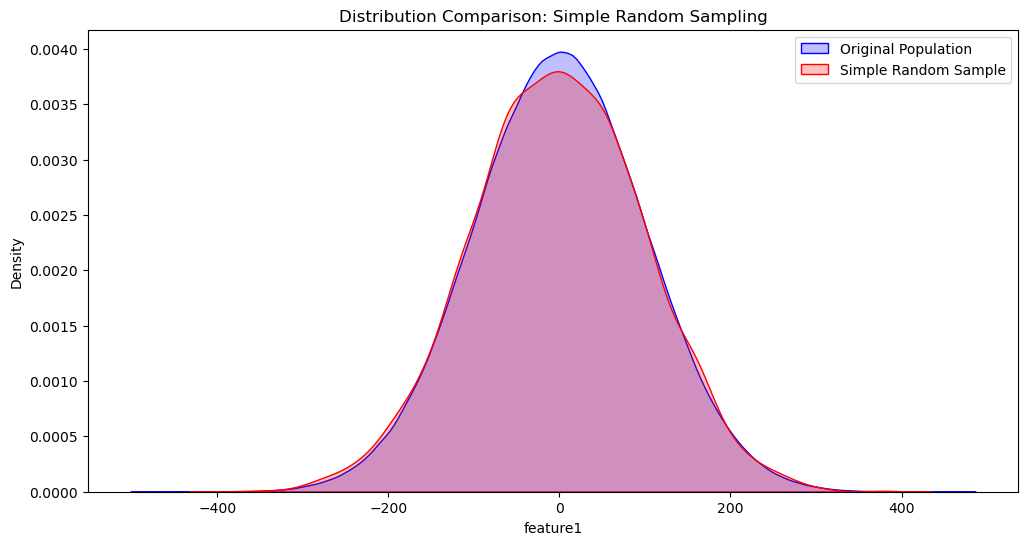

In [9]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(population_df['feature1'], label='Original Population', color='blue', fill=True)
sns.kdeplot(simple_random_sample['feature1'], label='Simple Random Sample', color='red', fill=True)
plt.title('Distribution Comparison: Simple Random Sampling')
plt.legend()
plt.show()

## STRATIFIED SAMPLING

In [10]:
# Calculate the fraction of the total population we want to sample from each group
fraction_to_sample = sample_size_n / len(population_df)

# Create an empty list to store the samples from each group
sampled_groups_list = []

# Loop through each unique group in the 'group' column
for group_id in population_df['group'].unique():
    # Get all the data for the current group
    group_df = population_df[population_df['group'] == group_id]
    
    # Take a random sample from this specific group
    group_sample = group_df.sample(frac=fraction_to_sample)
    
    # Add the sample to our list
    sampled_groups_list.append(group_sample)

# Combine the list of sampled dataframes into a single dataframe
stratified_sample = pd.concat(sampled_groups_list)

# Display the results
print(f"Stratified sample size: {len(stratified_sample)}")

# Compare group proportions
print("\nProportions in Original Population:")
print(population_df['group'].value_counts(normalize=True))

print("\nProportions in Stratified Sample:")
print(stratified_sample['group'].value_counts(normalize=True))

Stratified sample size: 5000

Proportions in Original Population:
group
1    0.200486
2    0.200170
4    0.200035
0    0.199807
3    0.199502
Name: proportion, dtype: float64

Proportions in Stratified Sample:
group
1    0.2004
2    0.2002
4    0.2000
0    0.1998
3    0.1996
Name: proportion, dtype: float64


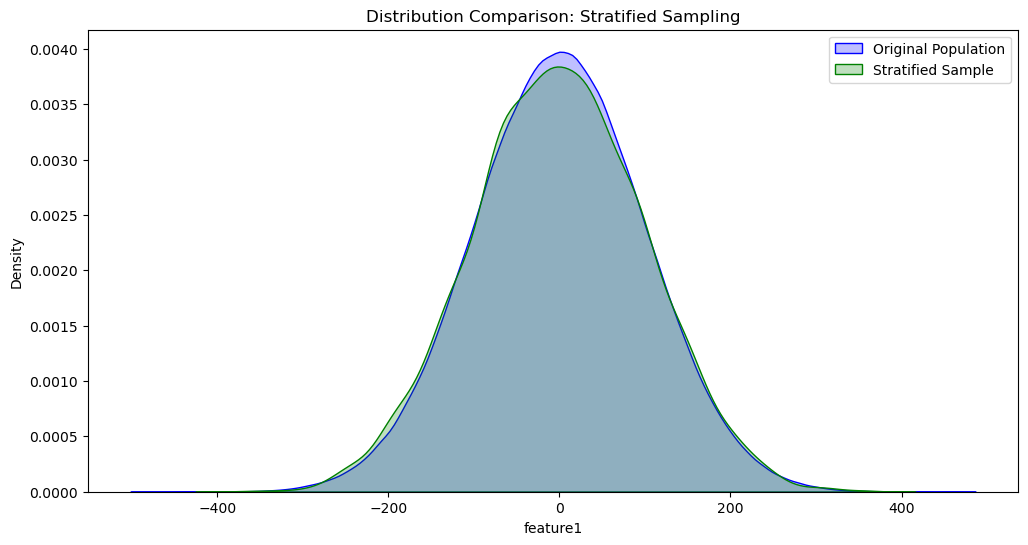

In [11]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(population_df['feature1'], label='Original Population', color='blue', fill=True)
sns.kdeplot(stratified_sample['feature1'], label='Stratified Sample', color='green', fill=True)
plt.title('Distribution Comparison: Stratified Sampling')
plt.legend()
plt.show()

## CLUSTERED SAMPLLING

In [17]:
# Define how many clusters we want to sample
num_clusters_to_sample = 5

# Get a list of unique cluster IDs
all_clusters = population_df['cluster'].unique()

# Randomly choose cluster IDs
chosen_clusters = random.sample(list(all_clusters), num_clusters_to_sample)

print(f"Randomly chosen clusters: {chosen_clusters}")

# Select all rows belonging to the chosen clusters
cluster_sample = population_df[population_df['cluster'].isin(chosen_clusters)]

print(f"\nCluster sample size: {len(cluster_sample)}")
cluster_sample.head()

Randomly chosen clusters: [12, 32, 92, 79, 29]

Cluster sample size: 50083


,feature1,feature2,group,cluster
14,-172.491783,-28.063735,2,79
18,-90.802408,-35.984826,1,32
30,-60.170661,28.758047,0,12
79,-198.756891,-8.341386,1,79
97,26.105527,-12.274058,3,79


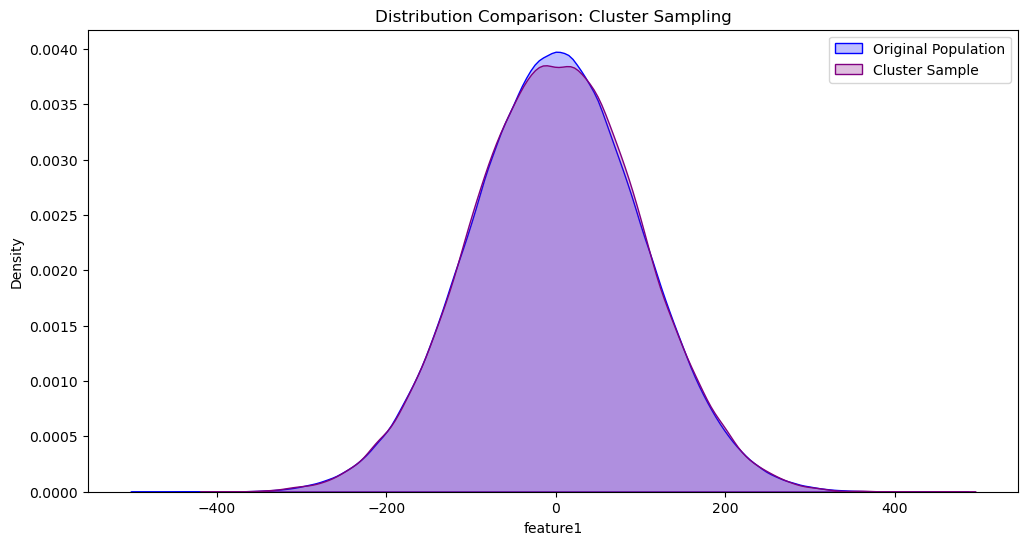

In [18]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(population_df['feature1'], label='Original Population', color='blue', fill=True)
sns.kdeplot(cluster_sample['feature1'], label='Cluster Sample', color='purple', fill=True)
plt.title('Distribution Comparison: Cluster Sampling')
plt.legend()
plt.show()

In [19]:
# Define how many clusters we want to sample
num_clusters_to_sample = 5

# Get a list of unique cluster IDs
all_clusters = population_df['cluster'].unique()

# Randomly choose cluster IDs
chosen_clusters = random.sample(list(all_clusters), num_clusters_to_sample)

print(f"Randomly chosen clusters: {chosen_clusters}")

# Select all rows belonging to the chosen clusters
cluster_sample = population_df[population_df['cluster'].isin(chosen_clusters)]

print(f"\nCluster sample size: {len(cluster_sample)}")
cluster_sample.head()

Randomly chosen clusters: [92, 18, 2, 22, 24]

Cluster sample size: 50031


,feature1,feature2,group,cluster
12,24.196227,38.483270,3,2
73,156.464366,-22.028162,3,2
86,91.540212,43.793985,0,24
90,9.707755,37.983332,4,2
126,-99.053633,15.560159,4,18


## SYSTEMATIC SAMPLING

In [20]:
# Define total population size (N) and desired sample size (n)
N = len(population_df)
n = sample_size_n

# Calculate the interval (k)
k = N // n
print(f"Population size N = {N}, Sample size n = {n}, Interval k = {k}")

# Choose a random starting point between 0 and k-1
start_index = random.randint(0, k-1)
print(f"Random start index: {start_index}")

# Create the systematic sample by slicing
systematic_sample = population_df.iloc[start_index::k]

print(f"\nSystematic sample size: {len(systematic_sample)}")
systematic_sample.head()

Population size N = 1000000, Sample size n = 5000, Interval k = 200
Random start index: 8

Systematic sample size: 5000


,feature1,feature2,group,cluster
8,-46.947439,-17.317037,1,96
208,51.504769,-33.048884,2,82
408,12.029563,18.001030,4,51
608,-177.872025,9.997433,3,82
808,125.575613,-45.682380,4,48


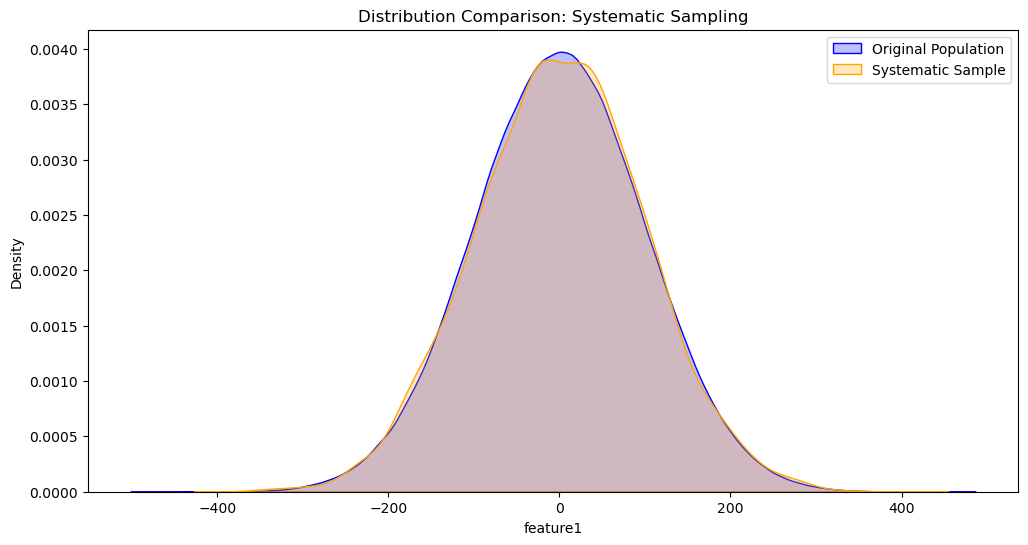

In [15]:
# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(population_df['feature1'], label='Original Population', color='blue', fill=True)
sns.kdeplot(systematic_sample['feature1'], label='Systematic Sample', color='orange', fill=True)
plt.title('Distribution Comparison: Systematic Sampling')
plt.legend()
plt.show()